In [ ]:
import numpy as np
import pandas as pd

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns
%matplotlib inline

#for Interactive Shells
from IPython.display import display

#removing warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# change working DIR
import os
os.chdir("/content/drive/MyDrive/Deep Learning/ANN/ANN_Regression")

In [ ]:
!dir

ANN_Regression.ipynb  concrete_data.csv  trained_model.h5


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Deep Learning/ANN/ANN_Regression/concrete_data.csv')


In [ ]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [ ]:
#split the dataset into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True,
                                                    random_state=43)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Model Building using Ann

In [ ]:
#Improving the ANN

from tensorflow.keras.layers import Dropout

model1 = Sequential()

#Adding the input layers and the first hidden layers
model1.add(Dense(units = 800,
                 kernel_initializer = 'uniform',
                 activation = 'relu',
                 input_shape = [X_train.shape[1]]))

#Adding the second hidden layer
model1.add(Dense(units = 1000,
                 kernel_initializer = 'uniform',
                 activation = 'relu',
                 ))

#Adding the third hidden layer
model1.add(Dense(units = 1200,
                 kernel_initializer = 'uniform',
                 activation = 'relu',
                 ))

#Adding the forth hidden layer
model1.add(Dense(units = 1600,
                 kernel_initializer = 'uniform',
                 activation = 'relu',
                 ))

#Adding the fifth hidden layer
model1.add(Dense(units = 2000,
                 kernel_initializer = 'uniform',
                 activation = 'relu',
                 ))

#Adding the output layer
model1.add(Dense(units = 1,
                 kernel_initializer = 'uniform',
                 activation = 'linear',
                 ))


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               7200      
                                                                 
 dense_1 (Dense)             (None, 1000)              801000    
                                                                 
 dense_2 (Dense)             (None, 1200)              1201200   
                                                                 
 dense_3 (Dense)             (None, 1600)              1921600   
                                                                 
 dense_4 (Dense)             (None, 2000)              3202000   
                                                                 
 dense_5 (Dense)             (None, 1)                 2001      
                                                                 
Total params: 7135001 (27.22 MB)
Trainable params: 71350

In [ ]:
#Compile the ANN
model1.compile(optimizer = 'adam', loss= 'mean_squared_error')

#fitting the ANN to the training set
history = model1.fit(X_train,y_train,
                     batch_size=62,
                     epochs=80,
                     validation_split=0.1,
                     verbose = 1)

#save trained model
model1.save("trained_model.h5")

Epoch 1/80
12/12 [==============================] - 8s 474ms/step - loss: 620.0929 - val_loss: 316.8642
Epoch 2/80
12/12 [==============================] - 4s 375ms/step - loss: 215.9891 - val_loss: 223.3765
Epoch 3/80
12/12 [==============================] - 3s 239ms/step - loss: 162.5924 - val_loss: 162.3000
Epoch 4/80
12/12 [==============================] - 3s 250ms/step - loss: 138.9185 - val_loss: 138.0755
Epoch 5/80
12/12 [==============================] - 3s 235ms/step - loss: 98.8156 - val_loss: 108.8275
Epoch 6/80
12/12 [==============================] - 4s 336ms/step - loss: 70.0444 - val_loss: 69.1882
Epoch 7/80
12/12 [==============================] - 4s 352ms/step - loss: 53.6177 - val_loss: 73.8933
Epoch 8/80
12/12 [==============================] - 2s 127ms/step - loss: 50.9827 - val_loss: 70.0036
Epoch 9/80
12/12 [==============================] - 2s 126ms/step - loss: 39.5015 - val_loss: 39.4524
Epoch 10/80
12/12 [==============================] - 1s 122ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


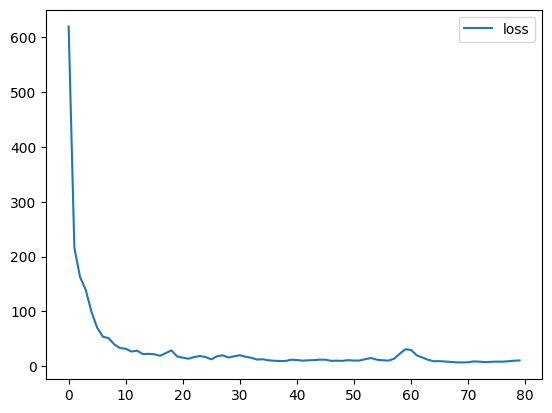

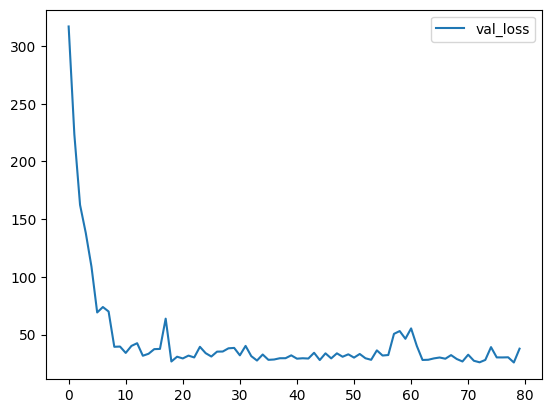

In [ ]:
history = pd.DataFrame(history.history) #mse loss and val_loss
history.loc[:, ['loss']].plot();
history.loc[:, ['val_loss']].plot();

In [ ]:
y_pred = model1.predict(X_test)

7/7 [==============================] - 0s 19ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8452293590235174

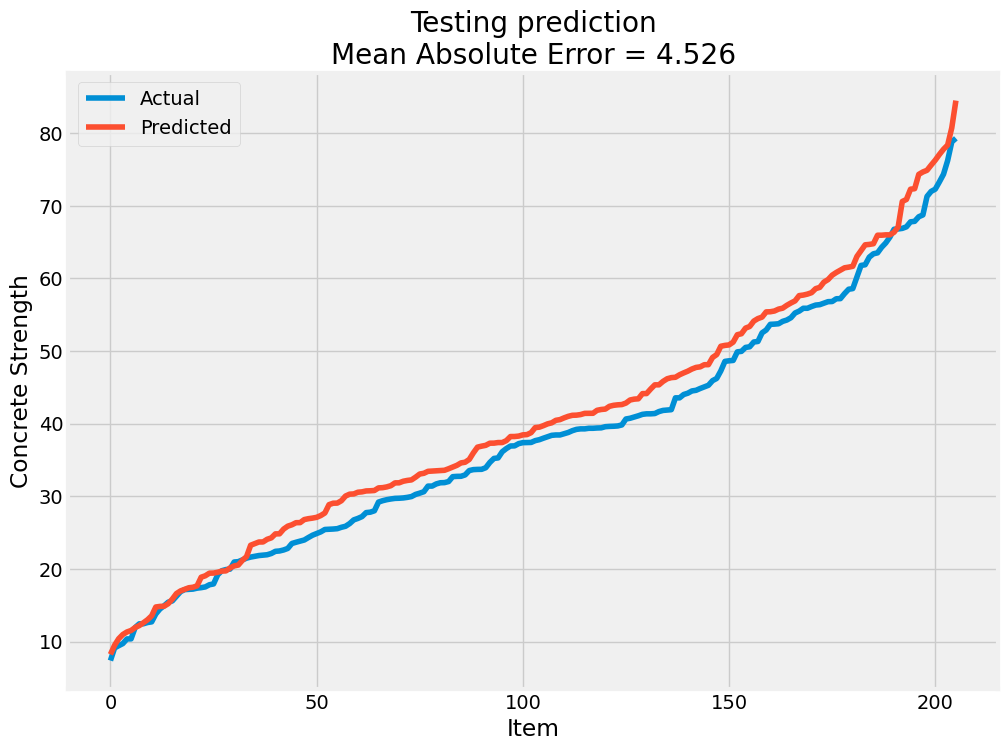

In [ ]:
MAE = mae(y_test,y_pred)

plt.figure(figsize=(12,8))
with plt.style.context('fivethirtyeight'):

    plt.plot(sorted(y_test), label='Actual')
    plt.plot(sorted(y_pred) , label='Predicted')

    plt.title('Testing prediction\nMean Absolute Error = {:.3f}'.format(MAE))
    plt.ylabel('Concrete Strength')
    plt.xlabel('Item')
    plt.legend()

plt.show()